In [1]:
!pip install plotly


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [2]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [3]:
df = pd.read_csv("C:/Users/pc/Desktop/DL/GOOG.csv")


In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
1,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
3,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
4,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804


In [5]:
# Extract "Date" and "Close" feature colums from the dataframe.
df = df[['Date', 'Close']]

In [6]:
# Concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4120 non-null   object 
 1   Close   4120 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.5+ KB


In [9]:
df['Date'].min(), df['Date'].max()
('2004-08-19', '2020-12-24')


('2004-08-19', '2020-12-24')

In [10]:
train = df.loc[df['Date'] <= '2017-12-24']
test = df.loc[df['Date'] > '2017-12-24']

In [11]:
train.shape, test.shape

((3360, 2), (760, 2))

In [12]:
scaler = StandardScaler()
scaler.fit(np.array(train['Close']).reshape(-1, 1))

train.loc[:, 'Close'] = scaler.transform(np.array(train['Close']).reshape(-1, 1))
test.loc[:, 'Close'] = scaler.transform(np.array(test['Close']).reshape(-1, 1))

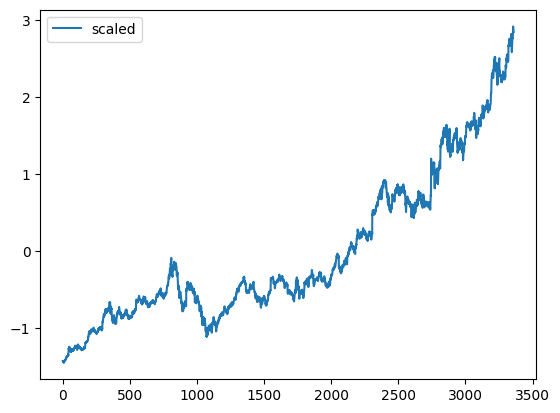

In [13]:
plt.plot(train['Close'], label = 'scaled')
plt.legend()
plt.show()

In [14]:
TIME_STEPS = 30

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X) - time_steps):
        X_out.append(X.iloc[i:(i + time_steps)].values)
        y_out.append(y.iloc[i + time_steps])
    return np.array(X_out), np.array(y_out)


In [15]:
X_train, y_train = create_sequences(train[['Close']], train['Close'])
X_test, y_test = create_sequences(test[['Close']], test['Close'])

print("Training input shape:", X_train.shape)
print("Testing input shape:", X_test.shape)



Training input shape: (3330, 30, 1)
Testing input shape: (730, 30, 1)


In [16]:
print(X_train[3331])


IndexError: index 3331 is out of bounds for axis 0 with size 3330

In [17]:
import numpy as np

data = np.array([
    [2.72669684], [2.71313015], [2.7032639], [2.7043271], [2.68268026], [2.73197026],
    [2.67494041], [2.67192083], [2.74043328], [2.74668476], [2.76646036], [2.82429825],
    [2.79537956], [2.68586986], [2.68480666], [2.6370053], [2.58814073], [2.61565644],
    [2.67192083], [2.7252936], [2.75132068], [2.76854419], [2.76590747], [2.76646036],
    [2.80277938], [2.86674105], [2.92181505], [2.89434217], [2.86997322], [2.86435976]
])

print(data)


[[2.72669684]
 [2.71313015]
 [2.7032639 ]
 [2.7043271 ]
 [2.68268026]
 [2.73197026]
 [2.67494041]
 [2.67192083]
 [2.74043328]
 [2.74668476]
 [2.76646036]
 [2.82429825]
 [2.79537956]
 [2.68586986]
 [2.68480666]
 [2.6370053 ]
 [2.58814073]
 [2.61565644]
 [2.67192083]
 [2.7252936 ]
 [2.75132068]
 [2.76854419]
 [2.76590747]
 [2.76646036]
 [2.80277938]
 [2.86674105]
 [2.92181505]
 [2.89434217]
 [2.86997322]
 [2.86435976]]


In [18]:
# set seed to regenerate same sequence of random numbers.
np.random.seed(21)
tf.random.set_seed(21)
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

C:\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0781 - val_loss: 0.1825
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.0227 - val_loss: 0.0684
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0195 - val_loss: 0.0585
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0216 - val_loss: 0.0336
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0195 - val_loss: 0.0489
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0148 - val_loss: 0.0239
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.0163 - val_loss: 0.0499
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.0171 - val_loss: 0.0849
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0209 - val_loss: 0.0721
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 0.0209 - val_loss: 0.0336
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0218 - val_loss: 0.0327


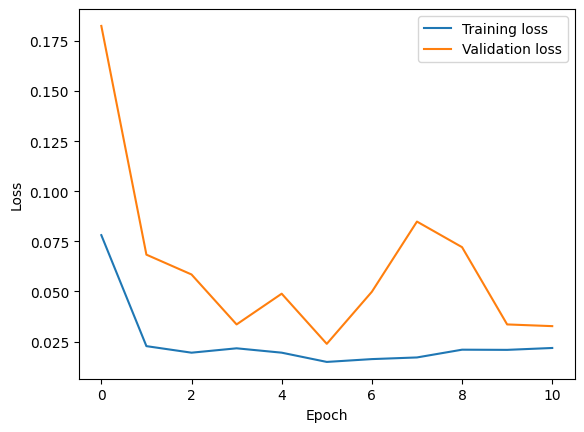

In [19]:
history = model.fit(X_train,
 y_train,
 epochs=100,
 batch_size=32,
 validation_split=0.1,
 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
mode='min')],
 shuffle=False)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();


In [20]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step


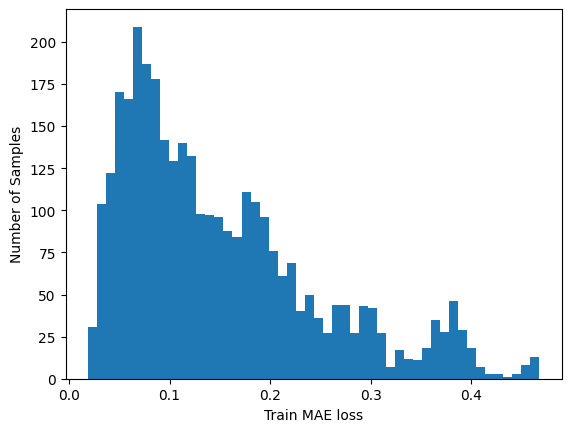

In [21]:
plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

In [22]:
# Set reconstruction error threshold
threshold = np.max(train_mae_loss)
print('Reconstruction error threshold:',threshold)

Reconstruction error threshold: 0.4676190485688487


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


Text(0, 0.5, 'Number of samples')

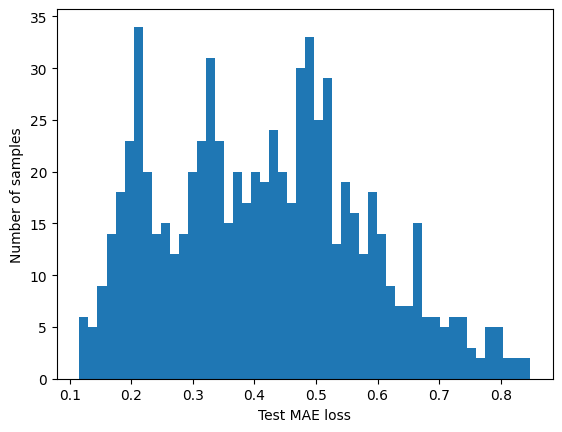

In [23]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)
plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [24]:
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

In [25]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies.head()

,Date,Close,loss,threshold,anomaly
3413,2018-03-14,3.229677,0.471122,0.467619,True
3414,2018-03-15,3.230059,0.494065,0.467619,True
3415,2018-03-16,3.171139,0.510598,0.467619,True
3416,2018-03-19,3.018373,0.491727,0.467619,True
3471,2018-06-06,3.176032,0.478877,0.467619,True


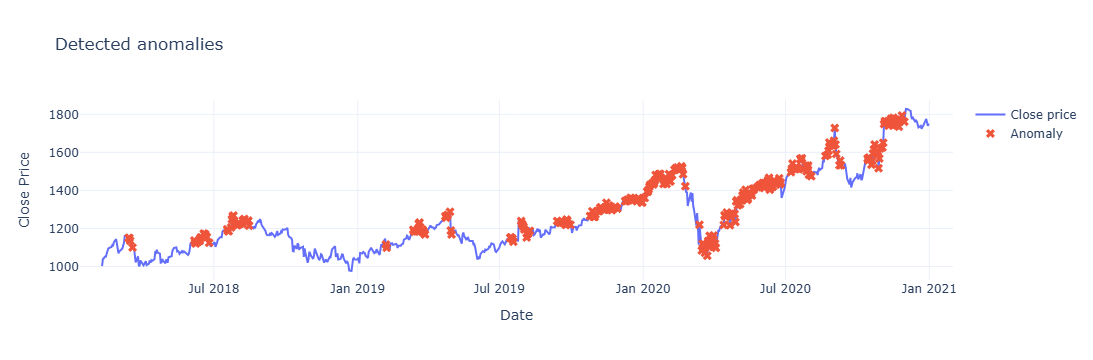

In [27]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --- Safety: make independent copies to avoid SettingWithCopyWarning ---
anomaly_df = anomaly_df.copy()
anomalies  = anomalies.copy()

# --- Ensure Date is datetime (use .loc to avoid the warning) ---
anomaly_df.loc[:, 'Date'] = pd.to_datetime(anomaly_df['Date'])
anomalies.loc[:,  'Date'] = pd.to_datetime(anomalies['Date'])

# --- Drop rows where Close is NaN (inverse_transform fails on NaN) ---
anomaly_df = anomaly_df.dropna(subset=['Close']).reset_index(drop=True)
anomalies  = anomalies.dropna(subset=['Close']).reset_index(drop=True)

# --- IMPORTANT: scaler must have been fitted earlier (e.g. on train[['Close']]) ---
# e.g. scaler.fit(train[['Close']])
# If scaler is not fitted you'll get a "not fitted" error.

# --- Use 2-D inputs for inverse_transform and flatten results for plotting ---
y_all  = scaler.inverse_transform(anomaly_df[['Close']]).ravel()   # note double brackets -> DataFrame (2D)
y_anom = scaler.inverse_transform(anomalies[['Close']]).ravel()

# --- Plot ---
fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=y_all, mode='lines',  name='Close price'))
fig.add_trace(go.Scatter(x=anomalies['Date'],   y=y_anom, mode='markers', name='Anomaly',
                         marker=dict(size=8, symbol='x')))

fig.update_layout(title='Detected anomalies', xaxis_title='Date', yaxis_title='Close Price', showlegend=True, template='plotly_white')
fig.show()
